<img align="right" src="images/tf-small.png" width="90"/>
<img align="right" src="images/etcbc.png" width="100"/>

# MiMi
## A Deterministic Coreference Resolver for Biblical Hebrew

MiMi is a deterministic -- meaning 'rule driven' -- coreference resolver for Biblical Hebrew. MiMi is the concatenation of Mi Mi in Biblical Hebrew, which means 'Who? Who?' MiMi is used as a tool to identify and analyse participants or entities in a text. MiMi has two phases: mention detection and coreference resolution. The aim was to build a near perfect mention detection phase and a modular coreference resolver that can be enhanced in future research. Most coreference resolvers, machine learning models or deterministic models, remove singletons in an additional third stage. We have chosen to retain singletons, since they are also of importance for participant analysis in Biblical Hebrew. MiMi, as demonstrated in this notebook, can be used for any Hebrew Bible book, regardless the genre. 

#### Phase One: Mention Detection
In the first phase the input text is tokenised and parsed for mentions. The API of [Text-Fabric](https://annotation.github.io/text-fabric/) is used to process the data of the BHSA [Hebrew Bible Database](https://etcbc.github.io/bhsa/) which contains the text of the Hebrew Bible augmented with linguistic annotations as compiled by the Eep Talstra Centre for Bible and Computer [ETCBC](http://etcbc.nl). The mention parser takes as input [phrase atoms](https://etcbc.github.io/bhsa/features/otype/), for which the ETCBC has already determined the boundaries. That makes the parsing of mentions much easier. For both the mention enrichment and the coreference resolution phase many BHSA features are used. The documentation can be found under the aforementioned phrase atom hyperlink. The mention parsing is done with a Python implemention of the lex and yac tools called [SLY](https://sly.readthedocs.io/en/latest/index.html). 

#### Phase Two: Coreference Resolution
In the second phase the mentions are stored as a coreference list of singleton sets. The coreference singleton sets are merged in a sequence of five sieves. MiMi resolves in order: predicates, pronouns, vocatives, appositions and fronted elements. MiMi resolves easy first, meaning that the most easy resolution choices are made first based on explicit information that is already available in the database. 
1. Predicates: MiMi's first sieve searches for explicit subject predicate relations. This is done with so-called mother - daughter clause and clause atom relations that the ETCBC has analysed. 
2. Pronouns: 1st and 2nd person mentions (verbs and pronouns) are resolved within the same paragraph, or domain. In the BHSA data one of the criteria for the determination of a domain is that the same subject is active. In that way it is possible to resolve 1st and 2nd person mentions relatively easy. 3rd person references are much harder and hence need more heuristic rules which are time consuming to program. 3rd person are therefore left out of consideration. 
3. Vocatives: vocative relations are characterised by 2nd person mentions. These are merged with the 2nd person predicate coreference classes. 
4. Appositions: apposition relations are code in the BHSA data. They are therefore easy to resolve.
5. Fronted elements: are also coded, but this data is most incomplete. The sieve is however added for two reasons. It does resolve some extra relations and the ETCBC aims at enriching this fronted element data in the near future. 

#### Statistics 
For both the mention detection phase and the coreference resolution phase statistics are generated per Hebrew Bible Book: 
* Mention detection statistics: give a view on what the success and failure of the mention parser is. The average success for the whole Hebrew Bible 99.5%. 
* Coreference resolution statistics: give a view on how many coreference singleton sets have been resolved. MiMi resolves about 29.6% sets on average. Important to note is that the unresolved sets contain both truly unresolved sets and singletons. The resolution percentage may thus in fact be higher. 
* Sieve statistics: give a view on how many singleton sets are resolved per sieve. 

#### Files
For each book a plain text `.out` file is generated in the same directory as in which the coreference command is given. The files are called `mention_errors_BIBLEBOOKNAME`. The `.out` file contains useful information about which phrase atoms could not be parsed by SLY's parser. The token is given, the text of the token, the start index of the word and word node. 

In [1]:
__author__ = 'erwich/sikkel'

In [2]:
import os
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
import seaborn as sns

In [3]:
from utils import ExportToLatex
from mimi_hb import GoMiMi

Parser debugging for MyParser written to parser.out


In [14]:
OUTPUT_LOC = os.path.expanduser('~/Documents/PhD/1-dissertation/DISSERTATIONlatex/Tables/')

In [4]:
mention_stats_df, coref_stats_df, sieve_stats_df = GoMiMi()


 Mention Parse Statistics Genesis: 
 15633 phrase atoms INPUT 
 15552 phrase atoms SUCCESFULLY parsed 
 +151 extra mentions SUCCESFULLY parsed from phrase atoms 
 -108 phrase atoms without mentions 
 81 phrase atom parse ERRORS 
 +0 extra mentions SUCCESFULLY parsed from phrase atom errors 
 -80 phrase atoms without mentions from phrase atom ERRORS 
 15596 mention coreference input 
 99.5% parsing succes 
 0.5% parsing error

 Coreference Resolution Statistics Genesis: 
 15596 total input corefs 
 4629 corefs RESOLVED 
 10967 corefs UNRESOLVED 
 29.7% corefs RESOLVED 
 70.3% corefs UNRESOLVED 
 2523 classes

 Sieve Statistics Genesis: 
 Predicate Sieve: 3246 
 Pronoun Sieve: 1007 
 Vocative Sieve: 63 
 Apposition Sieve: 300 
 Fronted Element Sieve: 13
 Total Sieves: 4629
 Total Classes: 2523

 Mention Parse Statistics Exodus: 
 11730 phrase atoms INPUT 
 11637 phrase atoms SUCCESFULLY parsed 
 +184 extra mentions SUCCESFULLY parsed from phrase atoms 
 -47 phrase atoms without mentions


 Mention Parse Statistics Isaiah: 
 13722 phrase atoms INPUT 
 13660 phrase atoms SUCCESFULLY parsed 
 +98 extra mentions SUCCESFULLY parsed from phrase atoms 
 -117 phrase atoms without mentions 
 62 phrase atom parse ERRORS 
 +0 extra mentions SUCCESFULLY parsed from phrase atom errors 
 -62 phrase atoms without mentions from phrase atom ERRORS 
 13641 mention coreference input 
 99.5% parsing succes 
 0.5% parsing error

 Coreference Resolution Statistics Isaiah: 
 13641 total input corefs 
 4089 corefs RESOLVED 
 9552 corefs UNRESOLVED 
 30.0% corefs RESOLVED 
 70.0% corefs UNRESOLVED 
 2104 classes

 Sieve Statistics Isaiah: 
 Predicate Sieve: 2619 
 Pronoun Sieve: 1116 
 Vocative Sieve: 167 
 Apposition Sieve: 180 
 Fronted Element Sieve: 7
 Total Sieves: 4089
 Total Classes: 2104

 Mention Parse Statistics Jeremiah: 
 15584 phrase atoms INPUT 
 15471 phrase atoms SUCCESFULLY parsed 
 +248 extra mentions SUCCESFULLY parsed from phrase atoms 
 -98 phrase atoms without mentions 
 


 Mention Parse Statistics Haggai: 
 382 phrase atoms INPUT 
 378 phrase atoms SUCCESFULLY parsed 
 +16 extra mentions SUCCESFULLY parsed from phrase atoms 
 -4 phrase atoms without mentions 
 4 phrase atom parse ERRORS 
 +0 extra mentions SUCCESFULLY parsed from phrase atom errors 
 -4 phrase atoms without mentions from phrase atom ERRORS 
 390 mention coreference input 
 98.9% parsing succes 
 1.1% parsing error

 Coreference Resolution Statistics Haggai: 
 390 total input corefs 
 117 corefs RESOLVED 
 273 corefs UNRESOLVED 
 30.0% corefs RESOLVED 
 70.0% corefs UNRESOLVED 
 71 classes

 Sieve Statistics Haggai: 
 Predicate Sieve: 59 
 Pronoun Sieve: 22 
 Vocative Sieve: 9 
 Apposition Sieve: 27 
 Fronted Element Sieve: 0
 Total Sieves: 117
 Total Classes: 71

 Mention Parse Statistics Zechariah: 
 2289 phrase atoms INPUT 
 2280 phrase atoms SUCCESFULLY parsed 
 +30 extra mentions SUCCESFULLY parsed from phrase atoms 
 -23 phrase atoms without mentions 
 9 phrase atom parse ERRORS 



 Mention Parse Statistics Daniel: 
 1782 phrase atoms INPUT 
 1769 phrase atoms SUCCESFULLY parsed 
 +23 extra mentions SUCCESFULLY parsed from phrase atoms 
 -4 phrase atoms without mentions 
 13 phrase atom parse ERRORS 
 +0 extra mentions SUCCESFULLY parsed from phrase atom errors 
 -12 phrase atoms without mentions from phrase atom ERRORS 
 1789 mention coreference input 
 99.3% parsing succes 
 0.7% parsing error

 Coreference Resolution Statistics Daniel: 
 1789 total input corefs 
 564 corefs RESOLVED 
 1225 corefs UNRESOLVED 
 31.5% corefs RESOLVED 
 68.5% corefs UNRESOLVED 
 262 classes

 Sieve Statistics Daniel: 
 Predicate Sieve: 360 
 Pronoun Sieve: 141 
 Vocative Sieve: 24 
 Apposition Sieve: 35 
 Fronted Element Sieve: 4
 Total Sieves: 564
 Total Classes: 262

 Mention Parse Statistics Ezra: 
 1566 phrase atoms INPUT 
 1550 phrase atoms SUCCESFULLY parsed 
 +18 extra mentions SUCCESFULLY parsed from phrase atoms 
 -3 phrase atoms without mentions 
 16 phrase atom parse E

In [5]:
# average mention detection success HB
avg_mention_success = round((1 - (mention_stats_df['pa errors'].sum() / mention_stats_df['pa parsed'].sum())) * 100, 1)

# average mention detection failure HB
avg_mention_failure = round((mention_stats_df['pa errors'].sum() / mention_stats_df['pa parsed'].sum()) * 100, 1)

print('Mention detection for the Hebrew Bible: \n',\
    f'{avg_mention_success}% average success \n',\
    f'{avg_mention_failure}% average failure')

Mention detection for the Hebrew Bible: 
 99.5% average success 
 0.5% average failure


In [6]:
# average coreference resolution success HB
avg_coreference_resolved = round(((1- coref_stats_df['unresolved'].sum() / coref_stats_df['input corefs'].sum())) * 100, 1)

# average coreference resolution success HB
avg_coreference_unresolved = round((coref_stats_df['unresolved'].sum() / coref_stats_df['input corefs'].sum()) * 100, 1)

print('Coreference Resolution for the Hebrew Bible: \n',\
    f'{avg_coreference_resolved}% average resolved \n',\
    f'{avg_coreference_unresolved}% average unresolved')

Coreference Resolution for the Hebrew Bible: 
 28.5% average resolved 
 71.5% average unresolved


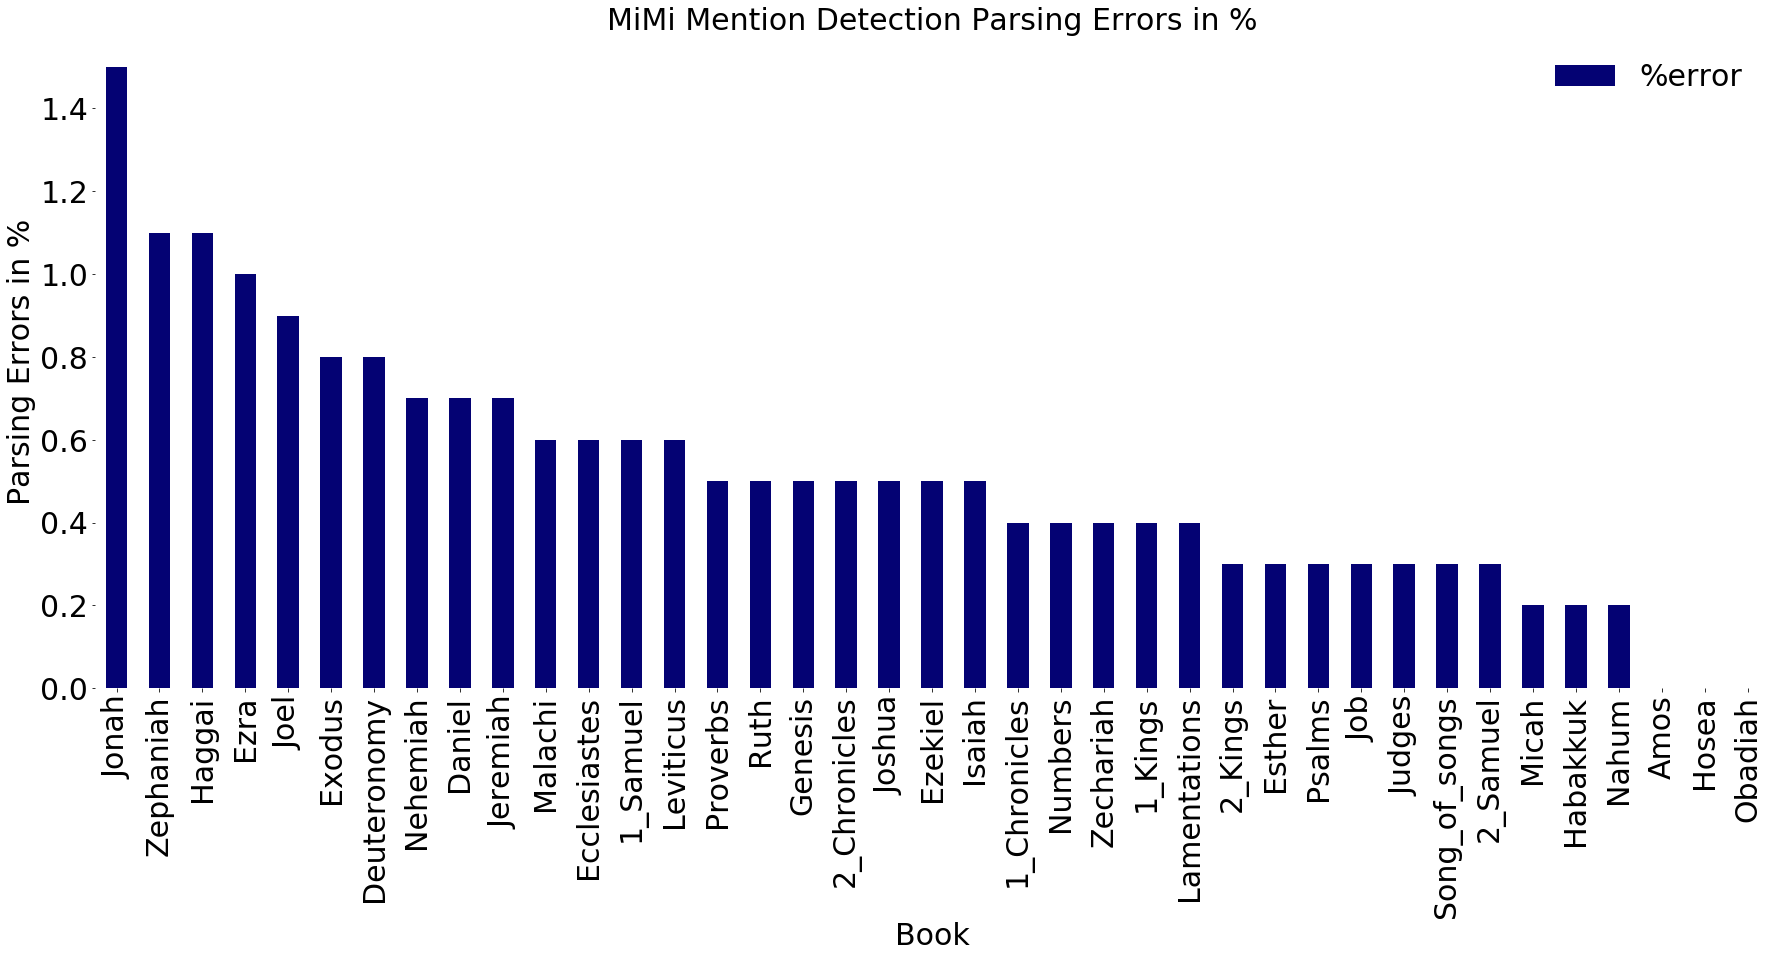

In [7]:
def PlotMentionDf(mention_stats_df):

    mention_stats_sort = mention_stats_df.sort_values(by=['%error'], ascending=False)
    
    mention_stats_sort.plot(x='book', y='%error', kind='bar', 
                            color='xkcd:deep blue', 
                            figsize=(30,12),
                            fontsize=30
                           )
    
    plt.title(('MiMi Mention Detection Parsing Errors in %'), fontsize=30)
    plt.xlabel('Book', fontsize=30)
    plt.ylabel('Parsing Errors in %', fontsize=30)
    plt.box(False)
    plt.legend(frameon=False, fontsize=30)
    plt.show()
    
PlotMentionDf(mention_stats_df)

In [15]:
mention_stats_df

,book,phrase atoms,pa parsed,+m,-pa,pa errors,+m errors,-pa errors,mentions,%parsed,%error
0,Genesis,15633,15552,151,108,81,0,80,15596,99.5,0.5
1,Exodus,11730,11637,184,47,93,2,87,11782,99.2,0.8
2,Leviticus,8491,8437,176,6,54,0,54,8607,99.4,0.6
3,Numbers,11053,11009,141,45,44,0,42,11107,99.6,0.4
4,Deuteronomy,11111,11020,116,40,91,0,90,11097,99.2,0.8
5,Joshua,6552,6522,159,26,30,0,30,6655,99.5,0.5
6,Judges,7208,7186,109,60,22,0,22,7235,99.7,0.3
7,1_Samuel,10018,9958,91,87,60,1,58,9965,99.4,0.6
8,2_Samuel,8197,8175,89,60,22,0,22,8204,99.7,0.3
9,1_Kings,9522,9482,103,37,40,0,40,9548,99.6,0.4


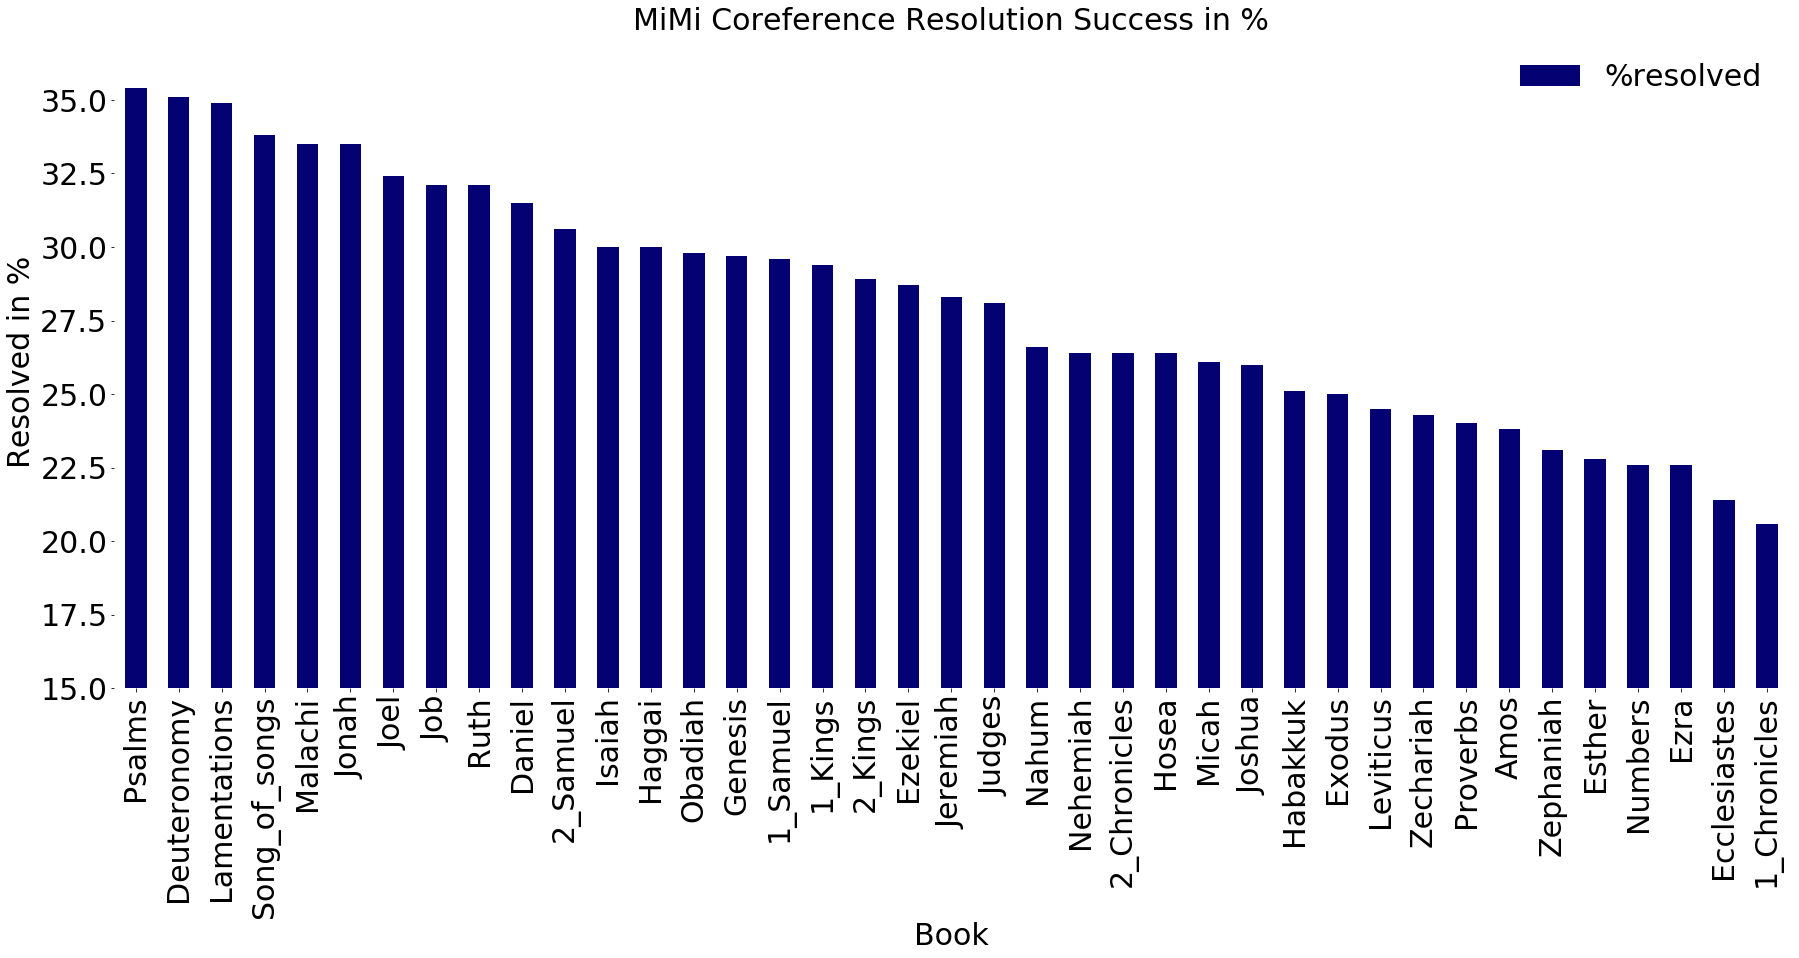

In [9]:
def PlotCoreferenceDf(coref_stats_df):

    coref_stats_sort = coref_stats_df.sort_values(by=['%resolved'], ascending=False)
    
    coref_stats_sort.plot(x='book', y='%resolved', kind='bar', color='xkcd:deep blue', 
                  figsize=(30,12),
                  fontsize=30, 
                 )

    plt.title(('MiMi Coreference Resolution Success in %'), fontsize=30)
    plt.xlabel('Book', fontsize=30)
    plt.ylabel('Resolved in %', fontsize=30)
    plt.box(False)
    plt.legend(frameon=False, fontsize=30)
    plt.ylim(ymin=15)
    plt.show()
    
PlotCoreferenceDf(coref_stats_df)

In [16]:
coref_stats_df

,book,input corefs,resolved,unresolved,%resolved,%unresolved,classes
0,Genesis,15596,4629,10967,29.7,70.3,2523
1,Exodus,11782,2951,8831,25.0,75.0,1536
2,Leviticus,8607,2112,6495,24.5,75.5,930
3,Numbers,11107,2509,8598,22.6,77.4,1459
4,Deuteronomy,11097,3900,7197,35.1,64.9,1488
5,Joshua,6655,1729,4926,26.0,74.0,962
6,Judges,7235,2035,5200,28.1,71.9,1176
7,1_Samuel,9965,2950,7015,29.6,70.4,1799
8,2_Samuel,8204,2512,5692,30.6,69.4,1499
9,1_Kings,9548,2803,6745,29.4,70.6,1497


In [17]:
ExportToLatex(OUTPUT_LOC, 'coref_stats_hb', coref_stats_df, indx = False)

In [18]:
sieve_stats_df

,book,predicate sieve,pronoun sieve,vocative sieve,apposition sieve,fronted element sieve,total sieves,classes
0,Genesis,3246,1007,63,300,13,4629,2523
1,Exodus,2261,557,13,116,4,2951,1536
2,Leviticus,1541,501,0,63,7,2112,930
3,Numbers,1845,395,18,243,8,2509,1459
4,Deuteronomy,1945,1596,17,336,6,3900,1488
5,Joshua,1212,318,6,188,5,1729,962
6,Judges,1651,236,21,124,3,2035,1176
7,1_Samuel,2225,536,33,155,1,2950,1799
8,2_Samuel,1726,447,46,289,4,2512,1499
9,1_Kings,1907,476,43,374,3,2803,1497


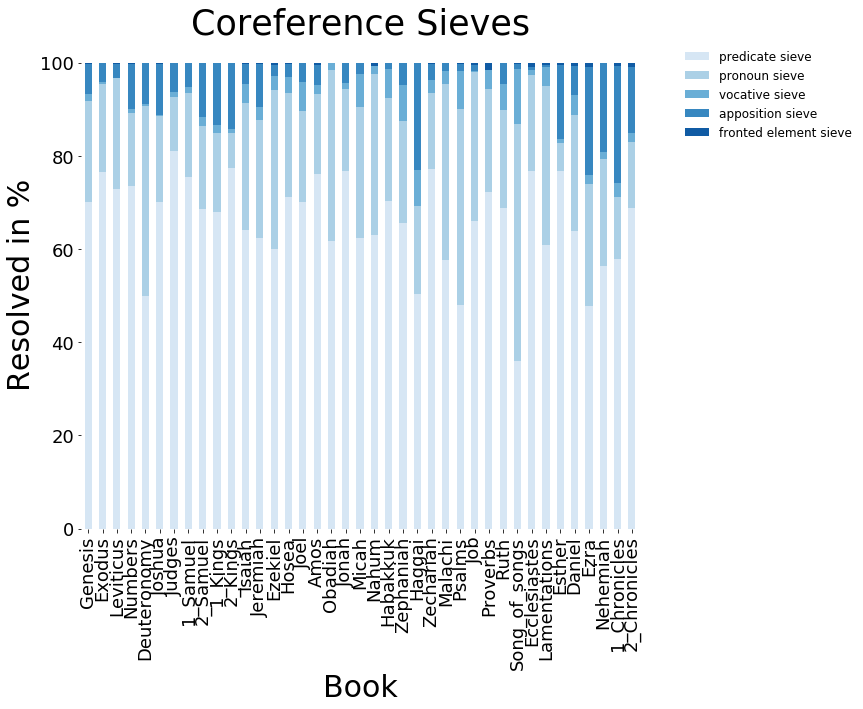

In [19]:
#sns.choose_colorbrewer_palette('sequential')
sieves = ('predicate sieve', 'pronoun sieve', 'vocative sieve',
          'apposition sieve', 'fronted element sieve')
colours = sns.color_palette("Blues", n_colors=len(sieves)) #"RdGy"

#books = sieve_stats_df['book']

df = sieve_stats_df.drop(['total sieves', 'classes'], axis=1)
df = df.set_index('book')

res = df.div(df.sum(axis=1), axis=0)*100
res = res.reset_index()

matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18) 
res.plot(kind='bar', x='book', stacked=True, figsize=(10,9), color=colours)
plt.title(('Coreference Sieves'), fontsize=35)
plt.xlabel('Book', fontsize=30)
plt.ylabel('Resolved in %', fontsize=30)
plt.box(False)
plt.legend(frameon=False, fontsize=12, loc='best', bbox_to_anchor=(.9, .5, 0.5, 0.5))
plt.show()

In [13]:
res

,book,predicate sieve,pronoun sieve,vocative sieve,apposition sieve,fronted element sieve
0,Genesis,70.123137,21.754159,1.360985,6.480881,0.280838
1,Exodus,76.618096,18.874958,0.440529,3.930871,0.135547
2,Leviticus,72.964015,23.721591,0.000000,2.982955,0.331439
3,Numbers,73.535273,15.743324,0.717417,9.685134,0.318852
4,Deuteronomy,49.871795,40.923077,0.435897,8.615385,0.153846
5,Joshua,70.098323,18.392134,0.347021,10.873337,0.289184
6,Judges,81.130221,11.597052,1.031941,6.093366,0.147420
7,1_Samuel,75.423729,18.169492,1.118644,5.254237,0.033898
8,2_Samuel,68.710191,17.794586,1.831210,11.504777,0.159236
9,1_Kings,68.034249,16.981805,1.534071,13.342847,0.107028


In [20]:
ExportToLatex(OUTPUT_LOC, 'sieve_stats_hb', sieve_stats_df, indx = False)